## Grid Search Hyperparameter optimization

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

In [213]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [214]:
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [215]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [216]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [217]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)


In [218]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [219]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [220]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


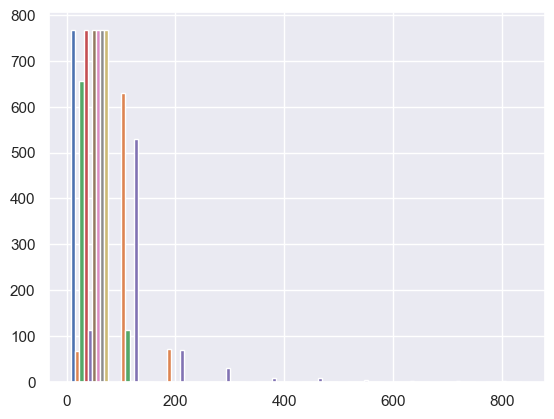

In [221]:
plt.hist(diabetes_data)
plt.show()

Correlation between various features


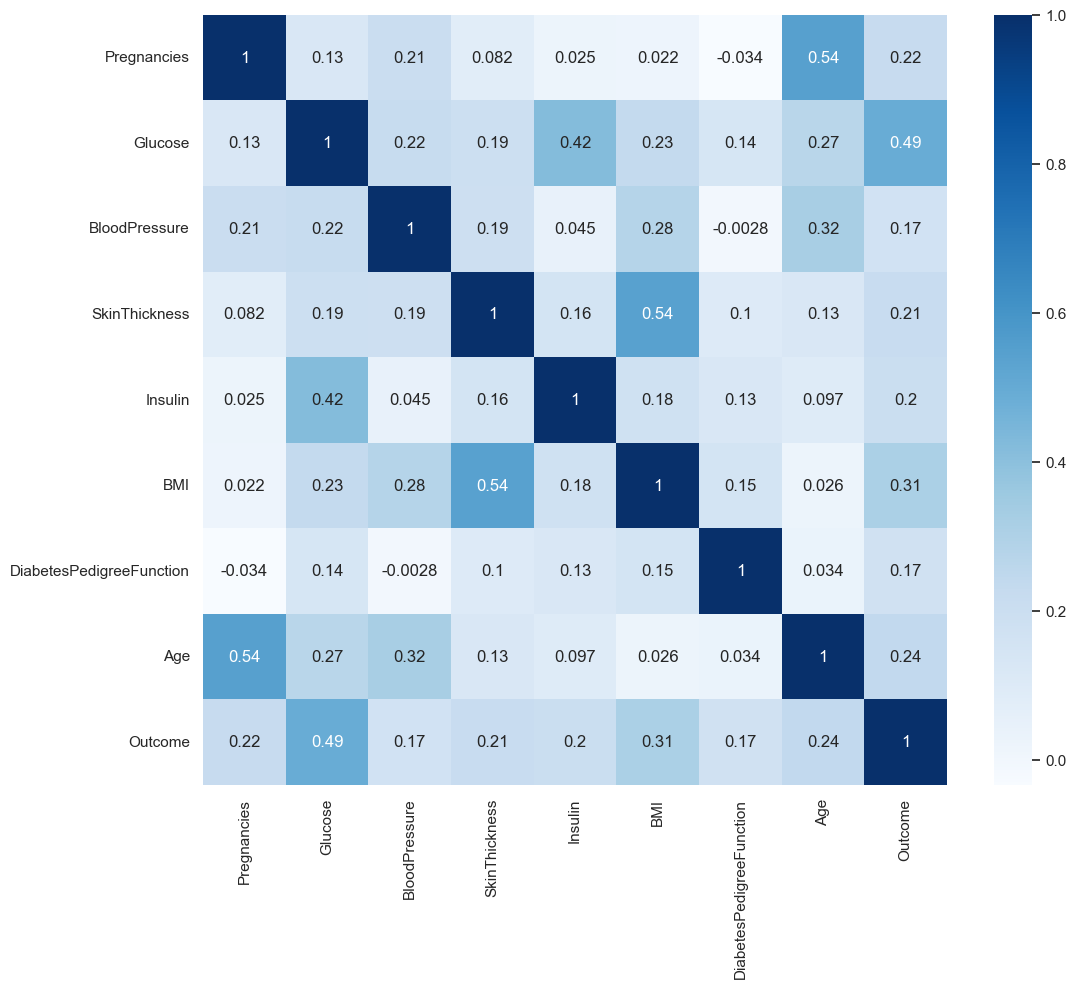

In [222]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')
plt.show()

In [223]:
y = diabetes_data['Outcome']
X = diabetes_data.drop('Outcome', axis =1)
display(X, y, diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [224]:
print(len(X), len(y))

768 768


In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 1363)

In [226]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_test_transformed = scaler.transform(X_test)

In [227]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
test_scores_transformed = []
train_scores = []

test_scores_with_K = []
train_scores_with_K = []
for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append((knn.score(X_train,y_train)))
    test_scores.append((knn.score(X_test,y_test)))
    test_scores_transformed.append((i, knn.score(X_test_transformed,y_test)))
    
    #test scores saved with representing K values
    train_scores_with_K.append(((i, knn.score(X_train,y_train))))
    test_scores_with_K.append(((i, knn.score(X_test,y_test))))

C:\Users\Mtize\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mtize\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mtize\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mtize\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mtize\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mtize\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

In [228]:
display("Training scores: ", train_scores, "Testing scores: ", 
        test_scores,"Testing Scalar transformed scores: ",  test_scores_transformed)

'Training scores: '

[1.0,
 0.851024208566108,
 0.8603351955307262,
 0.8119180633147114,
 0.8007448789571695,
 0.8026070763500931,
 0.7839851024208566,
 0.7858472998137802,
 0.7895716945996276]

'Testing scores: '

[0.7012987012987013,
 0.7359307359307359,
 0.7532467532467533,
 0.7532467532467533,
 0.7489177489177489,
 0.7575757575757576,
 0.7316017316017316,
 0.7359307359307359,
 0.7402597402597403]

'Testing Scalar transformed scores: '

[(1, 0.6406926406926406),
 (2, 0.6406926406926406),
 (3, 0.6406926406926406),
 (4, 0.6406926406926406),
 (5, 0.6406926406926406),
 (6, 0.6406926406926406),
 (7, 0.6406926406926406),
 (8, 0.6406926406926406),
 (9, 0.6406926406926406)]

In [229]:
Best_K_train = max([K_value[1] for K_value in train_scores_with_K])
Best_K_train = next((score[0] for score in train_scores_with_K if score[1] == 
Best_K_train), None)
print("The best K score for training is: ", Best_K_train)

The best K score for training is:  1


In [230]:
Best_K_test = max([K_value[1] for K_value in test_scores_with_K])
Best_K_test = next((score[0] for score in test_scores_with_K if score[1] == 
Best_K_test), None)
print("The best K score for testing is: ", Best_K_test)

The best K score for testing is:  6


In [260]:
display(len(train_scores), len(test_scores))

9

9

<Axes: title={'center': 'Train and Test model performance by number of neighbors'}>

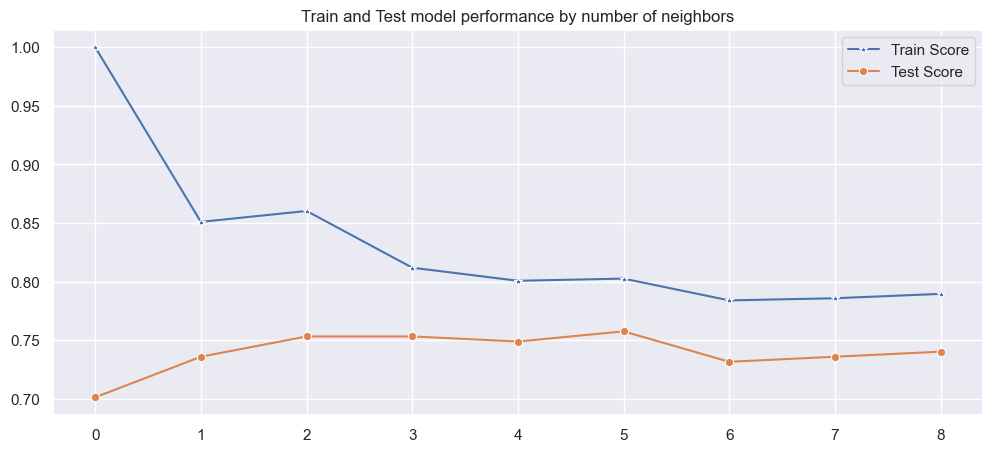

In [325]:
plt.figure(figsize=(12,5))
sns.lineplot(data=train_scores,marker='*',label='Train Score').set(title="Train and Test model performance by number of neighbors") 
sns.lineplot(data=test_scores,marker='o',label='Test Score')

In [330]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


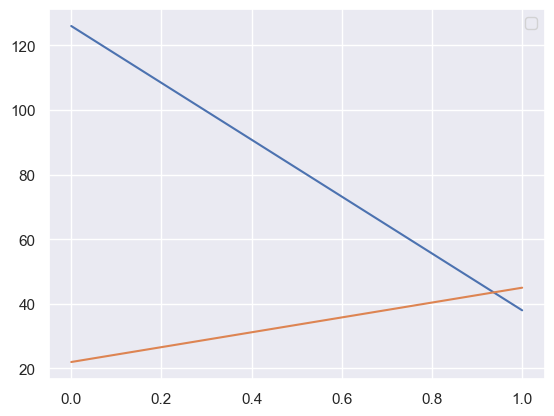

In [331]:
plt.plot(pl)
# plt.xlabel('y_test')
# plt.ylabel('y_pred')
plt.legend()
plt.show()

[[126  22]
 [ 38  45]]


<Axes: >

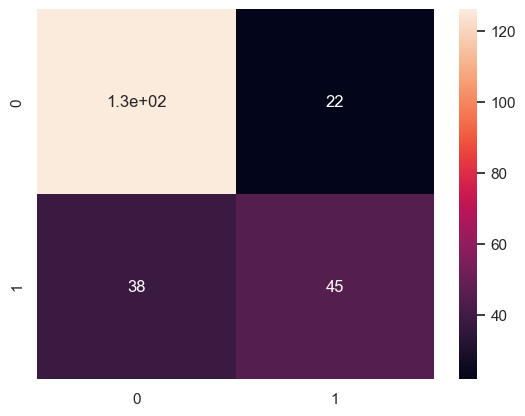

In [339]:
print(pl)
df_cm = pd.DataFrame(pl, index = [i for i in "01"],
                  columns = [i for i in "01"])
sns.heatmap(df_cm, annot=True)

In [329]:
display(len(y_pred), len(y_test))

231

231

In [332]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       164
           1       0.54      0.67      0.60        67

    accuracy                           0.74       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.76      0.74      0.75       231



In [333]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [334]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


In [337]:
from sklearn.ensemble import RandomForestRegressor

#define the parameter space
param_grid = {'max_depth':np.arange(1,50)}
tree_reg1 = RandomForestRegressor(max_depth=3, random_state=42)
tree_cv= GridSearchCV(tree_reg1,param_grid,cv=5)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [338]:
print("Best Score:" + str(tree_cv.best_score_))
print("Best Parameters: " + str(tree_cv.best_params_))

Best Score:0.29856111741812497
Best Parameters: {'max_depth': 4}
